In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [4]:
# filenames = [
#     'weights/L1 over bit estimates.pickle',
#     'weights/MSE over bit estimates.pickle',
#     'weights/log over bit estimates.pickle',
#     'weights/L1 over symbols.pickle',
#     'weights/MSE over symbols.pickle',
# ]
# shape = [14, 128]

filenames = [
    'weights/BCE over bit estimates (logits) symbol_weights.pickle',
    'weights/L1 over bit estimates symbol_weights.pickle',
    'weights/L1 over symbols symbol_weights.pickle',
    'weights/log over bit estimates symbol_weights.pickle',
    'weights/MSE over bit estimates symbol_weights.pickle',
    'weights/MSE over symbols symbol_weights.pickle',
]
shape = [14, 1]

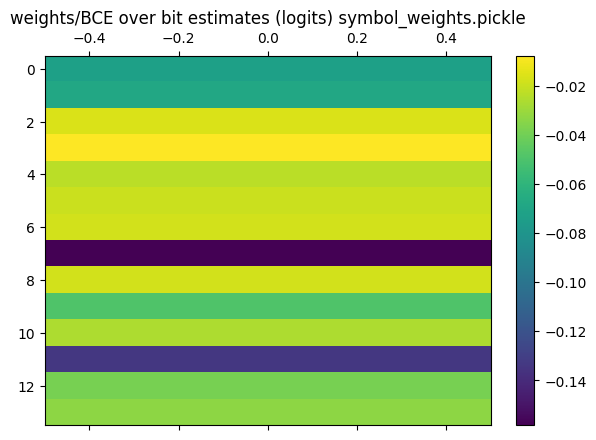

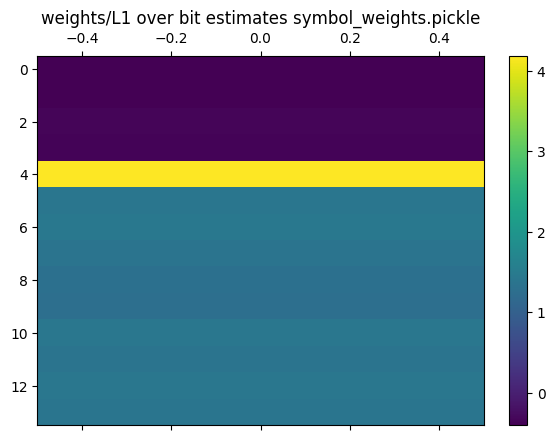

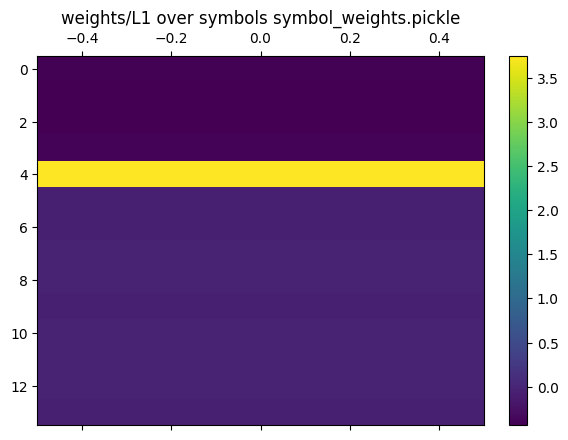

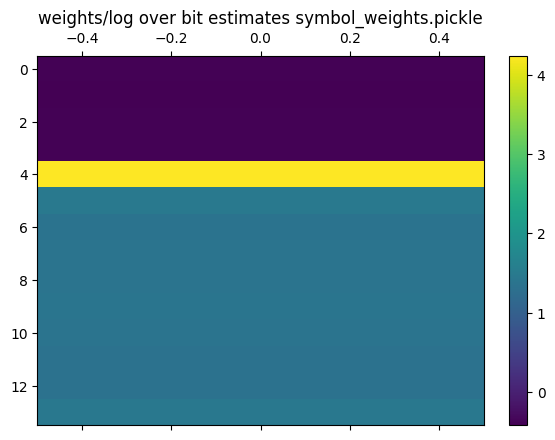

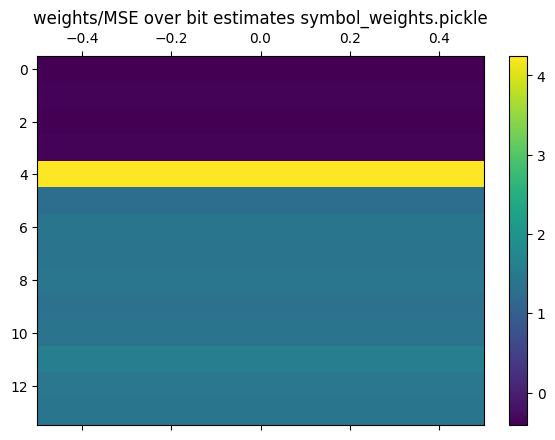

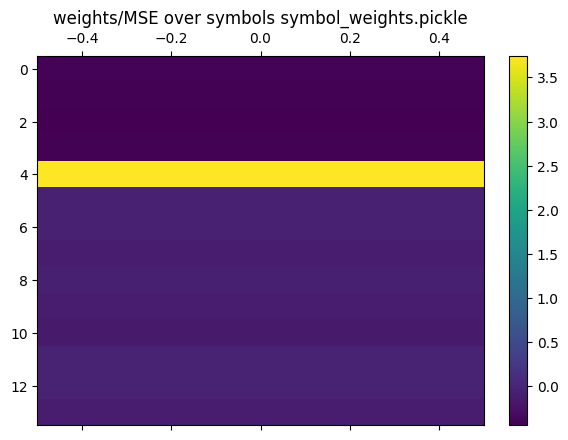

In [6]:
for filename in filenames:
    with open(filename, 'rb') as f:
        data = pickle.load(f)[0]
        data = np.reshape(data, shape)
        fig, ax = plt.subplots()
        im = ax.matshow(data, aspect='auto')
        ax.set_title(filename)
        fig.colorbar(im, fraction=0.05)